# Projeto final do curso de Machine Learning da ADA


## Premissa


Como forma de avaliação e validação dos conhecimento adquiridos durante o módulo "*Machine Lerning I*" no curso de *Data Science* ministrado pelo professor [Thiago Tavares Magalhães](https://www.linkedin.com/in/thiagotm/), na instituição [**Ada Tech**](https://ada.tech/), foi proposto um trabalho final que utilize os conhecimentos demonstrados e adquiridos durante a execução do curso.

O trabalho consiste em escolher um dataset de domínio publico e aplicar as ferramentas aprendidas em aula, de forma a obter, um modelo de aprendizado de máquina, capaz de categorizar e generalizar respostas em consistencia com o banco de dados no qual foi utilizado para o seu treinamento.

## Alunos/Autores

Os alunos que desenvolveram o trabalho foram:
- [Alexandre Paulino](https://www.linkedin.com/in/alexandre-e-paulino/)
- [Carolina Rutili de Lima](https://www.linkedin.com/in/carolinarutili/)
- [Raphael Giffoni Vieira Silva](https://www.linkedin.com/in/raphael-giffoni-b9a386172/)
- [Hugo Cezar Sales de Souza](https://www.linkedin.com/in/hugo-cs-souza/)
- [Lucas Meirelles](https://www.linkedin.com/in/lucas-meirelles-a758a5a4/)


## Escolha do Dataset

Escolhemos o [seguinte dataset](https://www.kaggle.com/datasets/tavarez/the-orl-database-for-training-and-testing) que consiste em imagens de pessoas para classificação.

O Banco de Dados ORL de Rostos é um conjunto de imagens faciais tiradas entre abril de 1992 e abril de 1994 no laboratório. O banco de dados foi usado no contexto de um projeto de reconhecimento facial realizado em colaboração com o Grupo de Fala, Visão e Robótica do Departamento de Engenharia da Universidade de Cambridge.

Há dez imagens diferentes de cada um dos 40 sujeitos distintos. Para alguns sujeitos, as imagens foram tiradas em diferentes momentos, variando a iluminação, expressões faciais (olhos abertos/fechados, sorrindo/não sorrindo) e detalhes faciais (óculos/sem óculos). Todas as imagens foram tiradas contra um fundo escuro homogêneo com os sujeitos em posição frontal e ereta (com tolerância para algum movimento lateral).

## Objetivo

O objetivo deste trabalho é utilizar este dataset, para classificar, através das imagens, o sexo biológico da pessoa da imagem em questão. O dataset está dividas em imagens de 20 homens e 20 mulheres no dataset.

## Desenvolvimento


### Ferramentas utilizadas

As ferramentas/conhecimentos utilizados no desenvolvimento deste trabalho serão:
- Utilização do Scikit-learn
- KNNs
- Random Forests
- Métricas de Avaliação de Modelos de Classificação
- Otimização de hiperparâmetros

### Explicação da manipulação do dataset

Existem 400 imagens de rostos dentro do dataset. Cada imagem tem dimensão de 46 pixels × 56 pixels. Cada pessoa tem 10 imagens distintas dentro do dataset.

A forma de categorizar e individualizar as 400 imagens será, transformar cada pixel em uma coluna para que possam ser comparados, onde o valor do pixel na escala de cinza será armazenado como uma variável quantitativa. Sendo assim, teremos uma matriz de dados de 400 linhas × 2576 colunas, onde cada linha representa uma das imagens. Posterior a esta manipulação, será criada uma coluna adicional de rótulos indicando o gênero biológica da pessoa que está apresentada na foto, por exemplo, "0" = feminino, "1" = masculino.


### Execução do código

#### Importação das bibliotecas

In [52]:
import cv2
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import statsmodels.api as sm
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#### Criação da coluna de gêneros

In [32]:
# Criada uma matriz correspondentes ao gêneros de cada imagem
gender = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
# Para cada gênero, como tem 10 imagens, repete 10 vezes para gerar a coluna corretamente
final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)
# Transforma a lista de gêneros em um array do numpy
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape


(400, 1)

#### Função para carregamento das imagens

In [33]:
# Indicar o caminho relativo da pasta do dataset
folder = './images/'  # Updated folder path
# Função para carregar as imagens para o ambiente
def load_images_from_folder(folder):
  i = 1
  # Gera uma lista dos caminhos das imagens e itera sobre eles
  for filename in os.listdir(folder):
    # Abre a imagem, transforma num array, reduz para uma dimensão e expande no eixo x
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))
  return final

pixels = load_images_from_folder(folder)
pixels.shape

(400, 5600)

#### Rotulando os dados e realizando a regressão

In [34]:
# Atribui o genero como categorização de saída
x, y = pixels, gender

x_reg = sm.add_constant(x)
model = sm.OLS(y,x_reg)
results = model.fit()
results.params

array([2.15568857e-06, 4.83164692e-05, 2.07274421e-05, ...,
       3.25743479e-05, 1.16551400e-04, 8.61888666e-05])

#### Encontrando o melhor pixel através do p-value

In [35]:
best_p = float('inf')
best_pixel = None

# Transpondo a matriz para melhor acessar as colunas
X_transposed = x.T

for j in range(len(X_transposed)):
    Xs = sm.add_constant(X_transposed[j])  # Adiciona uma coluna de 1s na matriz
    model = sm.OLS(y, Xs) #Realiza uma regressão linear
    results = model.fit() #Treina o modelo
    p_value = results.pvalues[1]  # Pega o p-value do pixel 

    if p_value < best_p:
        best_p = p_value
        best_pixel = j

print(f"Best Pixel: {best_pixel}, Best P-Value: {best_p}")

Best Pixel: 1824, Best P-Value: 1.6131875247093263e-06


#### Entrando o p-value do primeiro pixel


In [36]:
Xs, pvalues = [], []

for j in range(0,len(x)):
  for i in range(0,len(y)):
    Xs.append(x[i][j]) 
  Xs = sm.add_constant(Xs)
  model_2 = sm.OLS(y,Xs)
  results_each = model_2.fit()
  p_values = results_each.pvalues
  pvalues.append(p_values[1])
  Xs=[]

#### Encontrando os três melhores pixels através do p-value

In [37]:
MAX = float('inf')
def Print3Smallest(arr, n):
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
 
    for i in range(0, n):
        if arr[i] < firstmin:
            thirdmin = secmin
            secmin = firstmin
            firstmin = arr[i]
            first = i
        elif arr[i] < secmin:
            thirdmin = secmin
            secmin = arr[i]
            second = i
        elif arr[i] < thirdmin:
            thirdmin = arr[i]
            third = i
    print("First pixel = ", firstmin, "position = ", first)
    print("Second pixel = ", secmin, "position = ", second)
    print("Third pixel = ", thirdmin, "position = ", third)
    return first, second, third

n = len(pvalues)
first, second, third = Print3Smallest(pvalues, n)
pixels =  [first, second, third]


First pixel =  0.04054828430444952 position =  364
Second pixel =  0.04354810419281873 position =  365
Third pixel =  0.04792225319327901 position =  68


#### Encontrando a posição do pixel na imagem

In [38]:
x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

#### Pixels mais importantes para a classificação

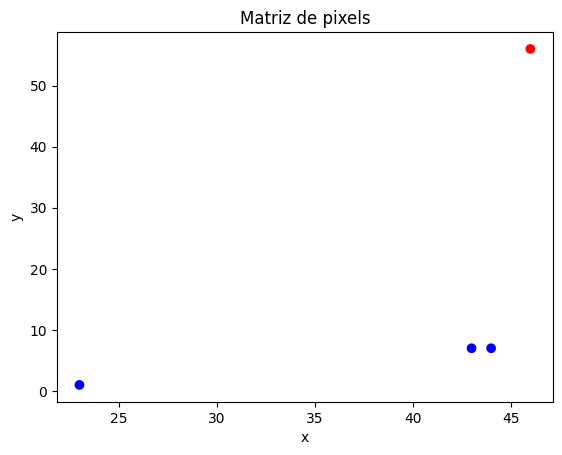

In [39]:
colors=["b", "b", "b", "r"]
plt.scatter(x_pos,y_pos, c=colors)
plt.title('Matriz de pixels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Regressão Linear utilizando Lasso

c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.671e-01, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Menor erro quadrático (Lasso): 0.09000000000000005
Alpha com o menor valor de erro (Lasso): 0.07121


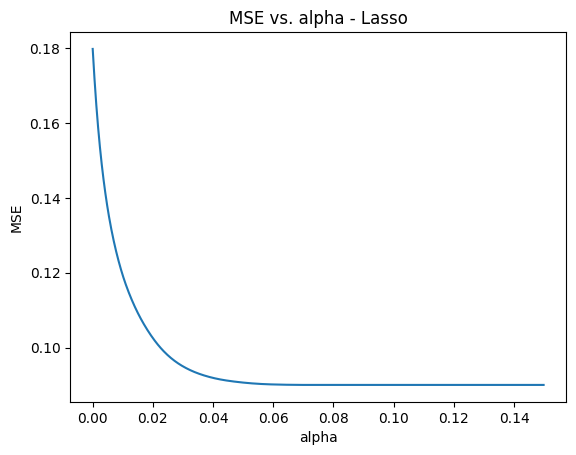

In [44]:
# Normaliza os dados utilizados o modelo de padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  
MSE, alphas = [], []

#Modifica o peso do coefiente angular
for i in range(1, 15000, 20):
    alpha = i / 100000
    lasso = Lasso(alpha=alpha) 
    lasso.fit(X_scaled, y) 
    # Calcula o erro quadrático médio
    MSE.append(np.mean((lasso.predict(X_scaled) - y) ** 2))
    alphas.append(alpha)

# Encontra o melhor coeficiente e o menor minimo
min_mse = min(MSE)
index_alpha = MSE.index(min_mse)
best_alpha_lasso = alphas[index_alpha]

print("Menor erro quadrático (Lasso):", min_mse)
print("Alpha com o menor valor de erro (Lasso):", best_alpha_lasso)

# Plote
plt.title("MSE vs. Alpha - Lasso")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.plot(alphas, MSE)
plt.show()


#### Regressão linear utilizando Rigde

Menor erro quadrático (Ridge): 4.4880566445811915e-17
Alpha com o menor valor de erro (Ridge): 1e-05


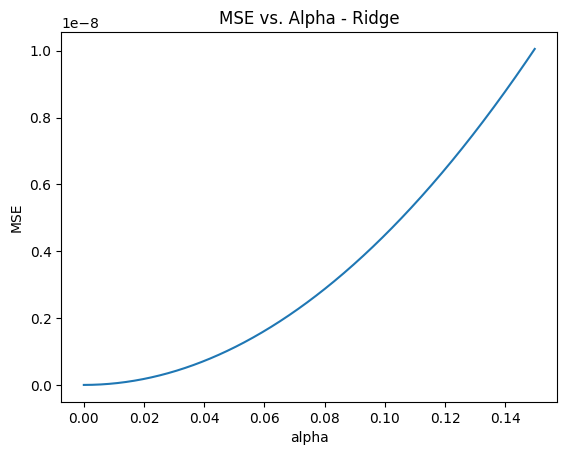

In [46]:
# Normaliza os dados utilizados o modelo de padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
MSE, alphas = [], []

for i in range(1, 15000, 20):
    alpha = i / 100000
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y) 
    MSE.append(np.mean((ridge.predict(X_scaled) - y) ** 2))
    alphas.append(alpha)

# Finding the minimum MSE and corresponding alpha
min_mse = min(MSE)
index_alpha = MSE.index(min_mse)
best_alpha_ridge = alphas[index_alpha]

print("Menor erro quadrático (Ridge):", min_mse)
print("Alpha com o menor valor de erro (Ridge):", best_alpha_ridge)

# Plotting the MSE vs alpha
plt.title("MSE vs. Alpha - Ridge")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas, MSE)
plt.show()

#### Calculando a média do erro quadrático

In [49]:
X_reg = sm.add_constant(x)
model = sm.OLS(y,X_reg)
results = model.fit()
MRS = np.mean((results.predict(X_reg) - y) ** 2)

print("Erro médio: ", MRS)

Erro médio:  0.1800000000000001


#### Separando os datasets em treino e teste

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Regressão Logística


In [64]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)
print("LR preductions: ", predictions_LR)
print("LR accuracy: ", 100*LR.score(X_test, y_test),"%")

LR preductions:  [1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1]
LR accuracy:  93.75 %


c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### K-Nearest Neighbor

c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

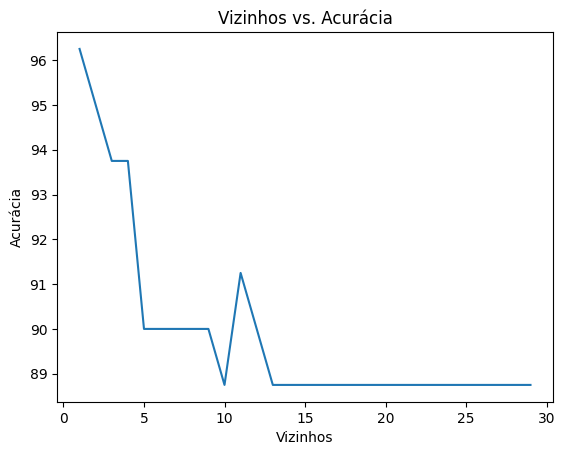

In [67]:
neighbor, accuracy = [], []
for k in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train,y_train)
    predictions_KNN = KNN.predict(X_test)
    neighbor.append(k)
    accuracy.append(100*KNN.score(X_test, y_test))

# Plot
plt.title("Vizinhos vs. Acurácia")
plt.xlabel("Vizinhos")
plt.ylabel("Acurácia")
plt.plot(neighbor, accuracy)
plt.show()

#### Support Vector Machine - Sigmoid

In [68]:
SVM = svm.SVC(kernel='sigmoid',C=1)
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)
print("SVM preductions: ", predictions_SVM)
print(" SVM accuracy model: ",100*SVM.score(X_test, y_test),"%")

SVM preductions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
 SVM accuracy model:  88.75 %


c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Support Vector Machine - Linear

In [70]:
SVM = svm.SVC(kernel='linear',C=1)
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)
print("SVM preductions: ", predictions_SVM)
print("SVM accuracy model: ",100*SVM.score(X_test, y_test),"%")

c:\Users\Nugrinho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM preductions:  [1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1]
SVM accuracy model:  96.25 %


### Conclusões


O número de mulheres é mínimo para este conjunto de dados, e o algoritmo de aprendizado de máquina não consegue aprender quando se trata de uma mulher. Podemos dizer que ele é tendencioso, e deveríamos treinar com um conjunto de dados mais diversificado.